In [24]:
import hoomd
import flowermd
import numpy as np
import matplotlib as plt
import mbuild as mb
import warnings
warnings.filterwarnings('ignore')
from flowermd.base import Molecule
from flowermd.library import FF_from_file

from flowermd.base import Pack

In [25]:
def espaloma_mol(file_path):
    mol = mb.load(file_path)
    for p in mol.particles():
        p.name = f"_{p.name}"
    return mol

In [26]:
system_file = 'cy5.mol2'
ff_filepath =  "cy5.xml"

In [27]:
esp_mol = espaloma_mol(system_file)
cy5 = Molecule(num_mols = 2, compound = esp_mol)

In [28]:
cy5.molecules[0].visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
cy5_ff = FF_from_file(forcefield_files=ff_filepath)
system=Pack(molecules=cy5,density=0.05,packing_expand_factor=10)

In [30]:
system.apply_forcefield(
    r_cut=2.5, 
    force_field=cy5_ff, 
    auto_scale=True, 
    scale_charges=True,
    remove_hydrogens=True, #check this
    remove_charges=True) #check this 

No charged group detected, skipping electrostatics.


In [31]:
system.hoomd_snapshot
#this snapshot allows us to initialize the simulation in the next step

In [32]:
from flowermd.base import Simulation
sim=Simulation.from_system(system=system, gsd_write_freq=100,log_write_freq=100)

Initializing simulation state from a gsd.hoomd.Frame.


In [33]:
hoomd_forces = system.hoomd_forcefield
hoomd_forces

In [34]:

lj_force = hoomd_forces[3]

dict(lj_force.params)
#here we see the parameters of the force field t0 and k

{'C0-C0-C2': _HOOMDDict{'t0': 2.1914687156677246, 'k': 882.8766661254487},
 'C0-C0-N1': _HOOMDDict{'t0': 2.3564724922180176, 'k': 602.5562148446506},
 'C2-C0-N1': _HOOMDDict{'t0': 2.233898878097534, 'k': 708.7293160261336},
 'C0-C0-C0': _HOOMDDict{'t0': 2.2176170349121094, 'k': 700.3515285450342},
 'C0-N1-C0': _HOOMDDict{'t0': 2.0452728271484375, 'k': 1224.1681393221738},
 'C0-C2-C0': _HOOMDDict{'t0': 1.9567296504974365, 'k': 1154.2032283984497},
 'C0-C2-C2': _HOOMDDict{'t0': 2.0078423023223877, 'k': 711.8165707213218},
 'C2-C2-C2': _HOOMDDict{'t0': 1.9695239067077637, 'k': 801.2945416917091}}

In [35]:
from flowermd.utils import get_target_box_mass_density

target_box = get_target_box_mass_density(density=system.density, mass=system.mass.to("g"))
print(target_box)

[2.86620471e-07 2.86620471e-07 2.86620471e-07] cm


In [36]:
sim.density.to("g/cm**3")

unyt_quantity(5.0000008e-05, 'g/cm**3')

In [37]:
sim.run_update_volume(n_steps=1000, period=1, kT=1, tau_kt=1, final_box_lengths= target_box)

Step 100 of 1000; TPS: 258.13; ETA: 0.1 minutes
Step 200 of 1000; TPS: 493.05; ETA: 0.0 minutes
Step 300 of 1000; TPS: 724.19; ETA: 0.0 minutes
Step 400 of 1000; TPS: 940.77; ETA: 0.0 minutes
Step 500 of 1000; TPS: 1149.07; ETA: 0.0 minutes
Step 600 of 1000; TPS: 1336.26; ETA: 0.0 minutes
Step 700 of 1000; TPS: 1533.42; ETA: 0.0 minutes
Step 800 of 1000; TPS: 1725.1; ETA: 0.0 minutes
Step 900 of 1000; TPS: 1910.85; ETA: 0.0 minutes
Step 1000 of 1000; TPS: 2086.46; ETA: 0.0 minutes


In [38]:
sim.density.to("g/cm**3")

unyt_quantity(0.05, 'g/cm**3')

In [39]:

import hoomd
for writer in sim.operations.writers:
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

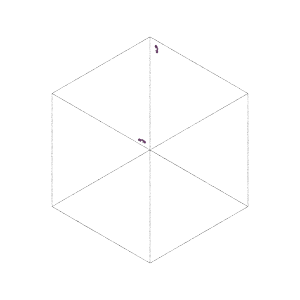

In [40]:

from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(gsd_file="trajectory.gsd", frame=0, view_axis=(1, 1, 1))
sim_visualizer.view()
                         

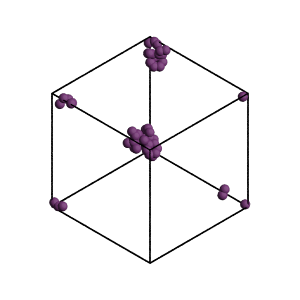

In [20]:
sim_visualizer.frame = -1
sim_visualizer.view()

In [21]:
sim.run_NVT(n_steps=2000, kT=0.5, tau_kt=0.01)

Step 99 of 2000; TPS: 8898.08; ETA: 0.0 minutes
Step 199 of 2000; TPS: 8600.2; ETA: 0.0 minutes
Step 299 of 2000; TPS: 7923.89; ETA: 0.0 minutes
Step 399 of 2000; TPS: 8436.94; ETA: 0.0 minutes
Step 499 of 2000; TPS: 8906.9; ETA: 0.0 minutes
Step 599 of 2000; TPS: 9497.38; ETA: 0.0 minutes
Step 699 of 2000; TPS: 9663.1; ETA: 0.0 minutes
Step 799 of 2000; TPS: 10036.05; ETA: 0.0 minutes
Step 899 of 2000; TPS: 10213.24; ETA: 0.0 minutes
Step 999 of 2000; TPS: 10482.58; ETA: 0.0 minutes
Step 1099 of 2000; TPS: 10712.65; ETA: 0.0 minutes
Step 1199 of 2000; TPS: 10939.58; ETA: 0.0 minutes
Step 1299 of 2000; TPS: 11079.65; ETA: 0.0 minutes
Step 1399 of 2000; TPS: 11249.06; ETA: 0.0 minutes
Step 1499 of 2000; TPS: 11376.4; ETA: 0.0 minutes
Step 1599 of 2000; TPS: 11477.67; ETA: 0.0 minutes
Step 1699 of 2000; TPS: 11539.85; ETA: 0.0 minutes
Step 1799 of 2000; TPS: 11564.89; ETA: 0.0 minutes
Step 1899 of 2000; TPS: 11587.39; ETA: 0.0 minutes
Step 1999 of 2000; TPS: 11614.93; ETA: 0.0 minutes


In [22]:

for writer in sim.operations.writers:
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

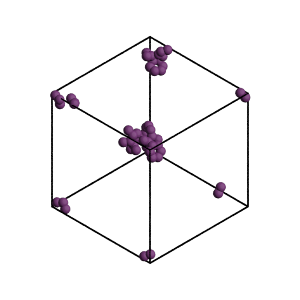

In [23]:

sim_visualizer.frame=-1
sim_visualizer.view()